In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# Dummy dataset: y = 2x + 1
X = np.linspace(0, 10, 100)
y = 2 * X + 1 + np.random.randn(100) * 2  # add noise
m = len(X)

print(X)
print(y)
print("size is ", m)

[ 0.          0.1010101   0.2020202   0.3030303   0.4040404   0.50505051
  0.60606061  0.70707071  0.80808081  0.90909091  1.01010101  1.11111111
  1.21212121  1.31313131  1.41414141  1.51515152  1.61616162  1.71717172
  1.81818182  1.91919192  2.02020202  2.12121212  2.22222222  2.32323232
  2.42424242  2.52525253  2.62626263  2.72727273  2.82828283  2.92929293
  3.03030303  3.13131313  3.23232323  3.33333333  3.43434343  3.53535354
  3.63636364  3.73737374  3.83838384  3.93939394  4.04040404  4.14141414
  4.24242424  4.34343434  4.44444444  4.54545455  4.64646465  4.74747475
  4.84848485  4.94949495  5.05050505  5.15151515  5.25252525  5.35353535
  5.45454545  5.55555556  5.65656566  5.75757576  5.85858586  5.95959596
  6.06060606  6.16161616  6.26262626  6.36363636  6.46464646  6.56565657
  6.66666667  6.76767677  6.86868687  6.96969697  7.07070707  7.17171717
  7.27272727  7.37373737  7.47474747  7.57575758  7.67676768  7.77777778
  7.87878788  7.97979798  8.08080808  8.18181818  8

In [12]:
# Hypothesis function
def predict(theta, x):
    return theta[0] + theta[1] * x

# Gradient function
def compute_gradients(theta, X, y):
    y_pred = predict(theta, X)
    dtheta0 = (1/m) * np.sum(y_pred - y)
    dtheta1 = (1/m) * np.sum((y_pred - y) * X)
    return np.array([dtheta0, dtheta1])

In [13]:

# -------- Batch Gradient Descent --------
theta_bgd = np.zeros(2)
lr = 0.01
epochs = 1000

for _ in range(epochs):
    grads = compute_gradients(theta_bgd, X, y)
    theta_bgd -= lr * grads

print("Batch GD Theta:", theta_bgd)

# -------- Stochastic Gradient Descent --------
theta_sgd = np.zeros(2)
lr = 0.01
epochs = 1000

for _ in range(epochs):
    i = np.random.randint(m)  # pick random sample
    xi, yi = X[i], y[i]
    y_pred = predict(theta_sgd, xi)
    dtheta0 = (y_pred - yi)
    dtheta1 = (y_pred - yi) * xi
    grads = np.array([dtheta0, dtheta1])
    theta_sgd -= lr * grads

print("Stochastic GD Theta:", theta_sgd)

Batch GD Theta: [1.13061309 1.97899492]
Stochastic GD Theta: [1.16836766 1.95541749]


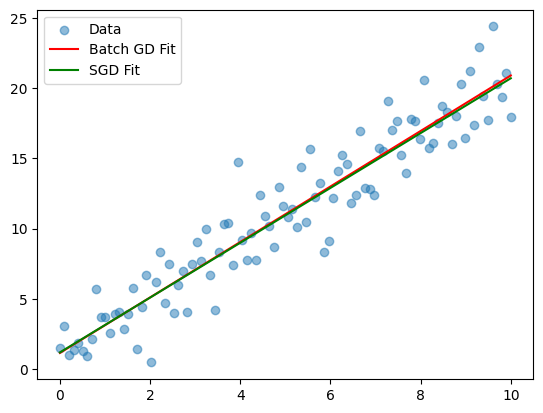

In [14]:
# -------- Plot Results --------
plt.scatter(X, y, label="Data", alpha=0.5)
plt.plot(X, predict(theta_bgd, X), color="red", label="Batch GD Fit")
plt.plot(X, predict(theta_sgd, X), color="green", label="SGD Fit")
plt.legend()
plt.show()